# E18. OCR 문자를 읽는 딥러닝

- 길가에서 마주치는 간판, 표지판 등의 글자를 잘 읽어낼 수 있는 딥러닝 모델을 만들고자 한다.
- 노이즈가 많고 글자 형태도 다양한 데이터셋에 대해 평가를 해본다.
- ocr은 tesseract와 keras-ocr을 활용한다.

## Tesseract

In [13]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output', lang = 'eng'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=lang,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [6]:
def recognize_images(cropped_image_path_list, lang='eng'):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,    
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [5]:
# 테스트
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test2.jpeg' 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png


In [7]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

CDANGER>

DO

NOT

=i T =i

Done


In [8]:
# 테스트
img_file_path = work_dir + '/test.jpg' 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
7. ‘

Done


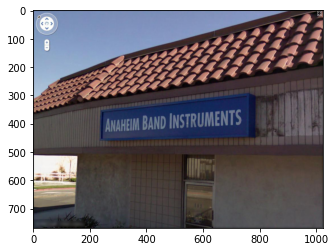

00_07.jpg
/aiffel/aiffel/ocr_python/images/0000.png
/aiffel/aiffel/ocr_python/images/0001.png
/aiffel/aiffel/ocr_python/images/0002.png
/aiffel/aiffel/ocr_python/images/0003.png
P<: ee <a

ve

INSTRUMENTS

+ =* !

Done


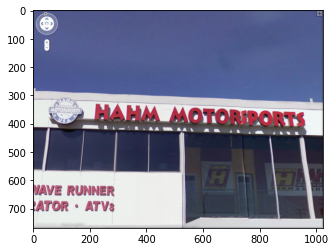

00_06.jpg
/aiffel/aiffel/ocr_python/images/0000.png
am - mn onl ' - — =. “ \- e

Done


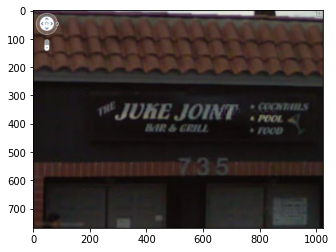

00_03.jpg
/aiffel/aiffel/ocr_python/images/0000.png
/aiffel/aiffel/ocr_python/images/0001.png
/aiffel/aiffel/ocr_python/images/0002.png
/aiffel/aiffel/ocr_python/images/0003.png
/aiffel/aiffel/ocr_python/images/0004.png
/aiffel/aiffel/ocr_python/images/0005.png
a tC

@

sa

pee i a,

Ae

Bande |

Done


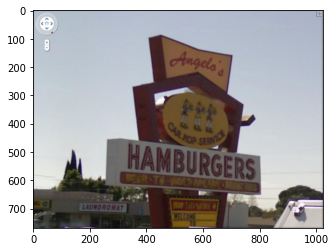

00_10.jpg
/aiffel/aiffel/ocr_python/images/0000.png
a

Done


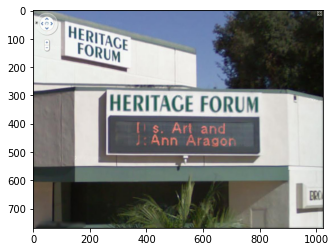

00_02.jpg
/aiffel/aiffel/ocr_python/images/0000.png
/aiffel/aiffel/ocr_python/images/0001.png
/aiffel/aiffel/ocr_python/images/0002.png
/aiffel/aiffel/ocr_python/images/0003.png
r z

aE


FORUM

Done


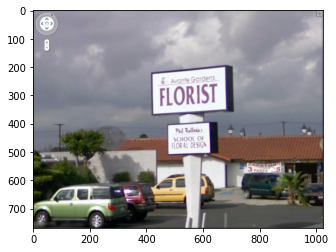

00_04.jpg
/aiffel/aiffel/ocr_python/images/0000.png

Done


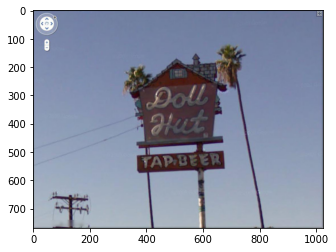

00_00.jpg
/aiffel/aiffel/ocr_python/images/0000.png

Done


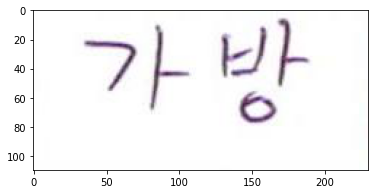

kor_writing2.jpg
/aiffel/aiffel/ocr_python/images/0000.png
가반

Done


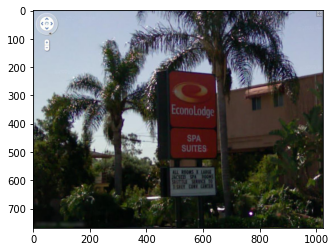

00_17.jpg
/aiffel/aiffel/ocr_python/images/0000.png

Done


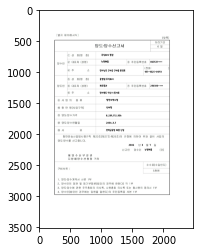

kor_print2.jpg
/aiffel/aiffel/ocr_python/images/0000.png
/aiffel/aiffel/ocr_python/images/0001.png
/aiffel/aiffel/ocr_python/images/0002.png
/aiffel/aiffel/ocr_python/images/0003.png
/aiffel/aiffel/ocr_python/images/0004.png
/aiffel/aiffel/ocr_python/images/0005.png
/aiffel/aiffel/ocr_python/images/0006.png
/aiffel/aiffel/ocr_python/images/0007.png
/aiffel/aiffel/ocr_python/images/0008.png
/aiffel/aiffel/ocr_python/images/0009.png
/aiffel/aiffel/ocr_python/images/0010.png
/aiffel/aiffel/ocr_python/images/0011.png
/aiffel/aiffel/ocr_python/images/0012.png
/aiffel/aiffel/ocr_python/images/0013.png
/aiffel/aiffel/ocr_python/images/0014.png
/aiffel/aiffel/ocr_python/images/0015.png
/aiffel/aiffel/ocr_python/images/0016.png
/aiffel/aiffel/ocr_python/images/0017.png
/aiffel/aiffel/ocr_python/images/0018.png
/aiffel/aiffel/ocr_python/images/0019.png
/aiffel/aiffel/ocr_python/images/0020.png
/aiffel/aiffel/ocr_python/images/0021.png
/aiffel/aiffel/ocr_python/images/0022.png
/aiffel/aiffel/ocr_

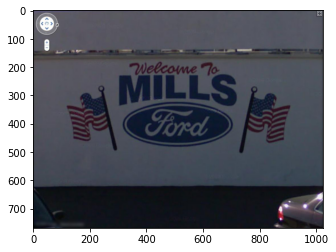

00_11.jpg
/aiffel/aiffel/ocr_python/images/0000.png


SystemError: tile cannot extend outside image

In [18]:
# 데이터셋을 work_dir에 업로드하고 불러온다.
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images/'
dir_list = os.listdir(work_dir)

for item in dir_list:
    if 'jpg' in item:
        img_file_path = work_dir + item 
        img = Image.open(img_file_path)
        
        plt.imshow(img)
        plt.show()
        print(item)
        
        # 한글 ocr 처리
        if 'kor' in item:
            cropped_image_path_list = crop_word_regions(img_file_path, work_dir, lang='kor')
            recognize_images(cropped_image_path_list, lang='kor')
        else:
            cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
            recognize_images(cropped_image_path_list)
    else:
        continue

- tesseract로 ocr을 해봤으며, [street dataset](http://vision.ucsd.edu/~kai/svt/)을 가져왔다. 한글 문서는 [ai hub 데이터](https://aihub.or.kr/aidata/33987)를 이용했다.
- 결과는, 구글 스트리트 뷰에서 가져온 이미지에서는 글자를 거의 잘 읽지 못했다. 데이터셋 자체가 화질이 낮고, 노이즈가 많다고 한다.
- ai 허브에서 가져온 한글 문서에서는 한글이 잘 검출되긴 했지만 잘 읽어내지 못했다. 그리고 글씨 '가방'은 '가반'으로 인식했다.
- 노이즈가 적은 데이터셋을 구성하면 tesseract로 ocr 이 더 잘 진행될 것 같다.
- system error는 해결방법을 찾지 못했다..

## keras-ocr

In [7]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [ ]:
# 이미지의 full path를 list에 저장한다.
img_path_list = []
for item in dir_list:
    if 'jpg' in item:
        img_path_list.append(work_dir+item)
    else:
        break

In [ ]:
images = [ keras_ocr.tools.read(file_path) for file_path in img_path_list]
prediction_groups = [pipeline.recognize([file_path]) for file_path in img_path_list]

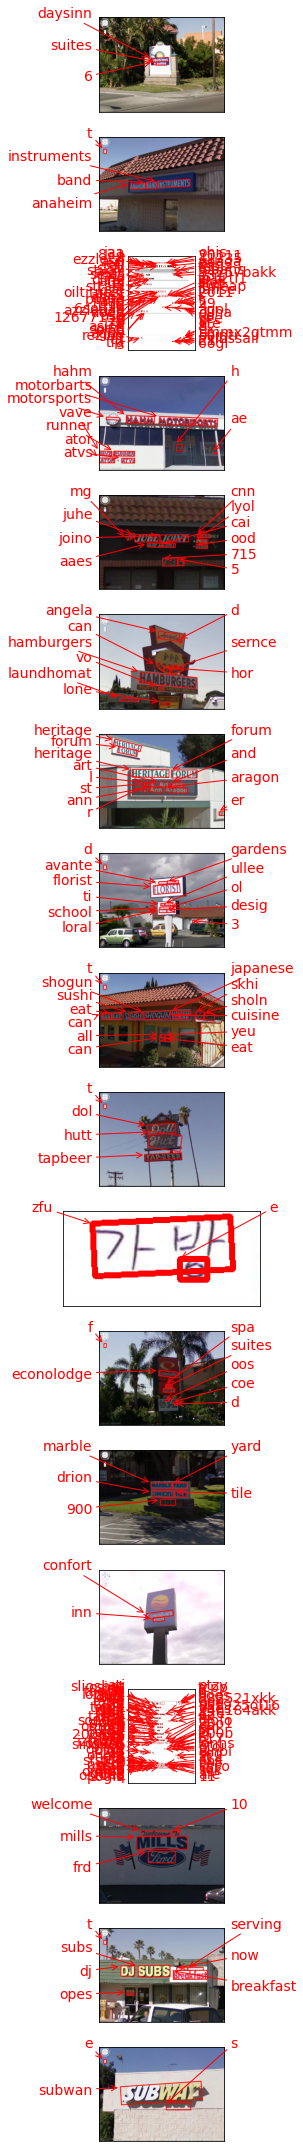

In [9]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)
    plt.tight_layout()

- keras-ocr 은 한글을 인식하지 못하지만, street view dataset에 대해서는 꽤 잘 글자를 읽어냈다.
- tesseract와 비교하면 영어에 대해서 keras-ocr이 글자를 더 잘 detect하고 recognize 한다. (작은 글씨도 읽어오고, 글자도 맞게 읽어온다.)
- 따라서 google street view와 같이 길을 가면서 마주치는 글자들을 읽어내는 모델을 만들고자 한다면 keras-ocr 이 적합할 것 같다. 단, 영어에 대해서만.

In [5]:
# fiftyone zoo 모듈로 텍스트 모양, 크기, 배치, 노이즈가 있는 이미지 가져오기
!pip install fiftyone

     |████████████████████████████████| 1.1 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 75.3 MB/s eta 0:00:01
     |████████████████████████████████| 631 kB 75.8 MB/s eta 0:00:01
     |████████████████████████████████| 29.2 MB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 786 kB/s  eta 0:00:01
     |████████████████████████████████| 36.7 MB 72.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 73.1 MB/s eta 0:00:01
     |████████████████████████████████| 526 kB 54.8 MB/s eta 0:00:01
     |████████████████████████████████| 557 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 74.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 71.5 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 225 kB 71.9 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 69.4 MB/s eta 0:00:01
     |████████████████████████████

In [6]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load COCO-2017
dataset = foz.load_zoo_dataset("coco-2017", split='validation')

# Give the dataset a new name, and make it persistent so that you can
# work with it in future sessions
dataset.name = "coco-2017-validation-example"
dataset.persistent = True

# Visualize the in the App
session = fo.launch_app(dataset)

 100% |██████|    1.9Gb/1.9Gb [3.1s elapsed, 0s remaining, 667.7Mb/s]       
Extracting annotations to '/aiffel/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |██████|    6.1Gb/6.1Gb [11.0s elapsed, 0s remaining, 583.7Mb/s]      
Extracting images to '/aiffel/fiftyone/coco-2017/validation/data'
Writing annotations to '/aiffel/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/aiffel/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████| 5000/5000 [30.6s elapsed, 0s remaining, 173.1 samples/s]      
Dataset 'coco-2017-validation' created
